An essential part of any image feature extraction procedure is **Edge Detection**. The process of edge detection is used extensively in modern classical image processing algorithms for extracting the structure of the objects/features depicted in an image. Quantum Image processing being an emerging field, is very intriguing and enables one to have exponential speedup (todo: can we add a reference exponential speedup in image processing?) in certain cases over classical image processing. Although, edge detection is fairly efficient in classical image processing, it becomes very slow for larger images due to the huge resolution of these images and the pixel-wise computation that is necessary for most of the classical edge detection algorithms.

On the other hand, the previous application shows how one can convert classical images to quantum images using the Quantum Image Representations (QImRs) like Flexible Representation of Quantum Images (FRQI) [1] and Novel Enhanced Quantum Representation (NEQR) [2] techniques. This section discusses about the Quantum Probability Image Encoding (QPIE) [3] representation and also talks about extending the usage of these QImRs to perform edge detection using the Quantum Hadamard Edge Detection (QHED) algorithm [3].

# Quantum Probability Image Encoding (QPIE)

The QPIE representation uses the probability amplitudes of a quantum state to store the pixel values of a classical image. If we have $n$ -qubits, we have access to up to $2^n$ -states in superposition. In QPIE we take advantage of this fact to design an efficient and robust encoding scheme for Black-and-White (B&W) or RGB images and exponentially reduce the memory required to store the data. That means, for storing a 4-pixel image, we need just 2-qubits; for 8-pixel image we need 3-qubits, and so on. In general, the number of qubits $(n)$ for a $N$-pixel image is calculated as:-

$$
n = \lceil log_2N \rceil
\label{eq:Num_qubits} \tag{1.1}
$$

## Classical image to QPIE state
Let us take a sample image with four pixels which is arranged in 2D as follows:-

<img src='./images/classical_repr.png' align='center' width='200px'>

Here, the vector $(I_0, I_1, I_2, I_3)$ or $(I_{00}, I_{01}, I_{01}, I_{11})$ represents color intensities (in 8-bit B&W color) of different pixels $(P_{00}, P_{01}, P_{10}, P_{11})$ represented as a 2D matrix to form a $2 \times 2$ classical image. The image can be represented in terms of it's pixel intensities as follows:

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
I = (I_{jk})_{N_1 \times N_2}
\label{eq:Classical_Img} \tag{1.2}
$$

(todo: can we explain this last equation a bit more please?)

Now, we need to represent these pixel intensities as the probability amplitudes of a particular quantum state. To do this, the pixel intensities should be normalized so that the sum of the squares of all the probability amplitudes is 1. For every $c_i$ corresponding to respective $I_{jk}$, the normalization can be done as follows:-

$$
c_i = \frac{I_{jk}}{\sqrt{\sum I_{jk} ^2}}
\label{eq:QPIE_normalize} \tag{1.3}
$$

After aforementioned normalization, the quantum-image looks like,

<img src='./images/QPIE_repr.png' align='center' width='200px'>

Finally, assigning the normalized pixel color values of each pixel $P_i$ to the respective quantum state $\ket{i}$, we can write the image state $\ket{\text{Img}}$ as:-

$$
\ket{\text{Img}} = c_0 \ket{00} + c_1 \ket{01} + c_2 \ket{10} + c_3 \ket{11}
\label{eq:QPIE_Img} \tag{1.4}
$$

OR generalizing for $n$-qubits, we have,

$$
\ket{\text{Img}} = \sum _{i=0} ^{2^n-1} c_i \ket{i}
\label{eq:QPIE_Img_sum} \tag{1.5}
$$

Such a state can be very efficiently prepared (todo: reference for this please) just by using a few rotation and CNOT gates. A sample circuit for the above 4-pixel image example with B&W pixel values $(0, 128, 192, 255)$ is as follows:-

<img src='./images/state_prep.png' align='center' width='400px'>

# Quantum Hadamard Edge Detection (QHED)

In general, classical edge detection algorithms rely mostly on the computation of image gradients i.e. identifying locations in the image for dark-to-light (or light-to-dark) intensity transitions. Hence, the worst case time complexity for most of them is $O(2^n)$. This means that each pixel needs to be processed individually to determine the gradients.

On the contrary, quantum edge detection algorithms like QSobel [4] provide exponential speedup compared to the existing classical edge detection algorithms. However, there are some steps involved in the algorithm that make it quite inefficient, for example the COPY operation and a quantum black box to calculate the gradients of all the pixels. For both the operations, there is no single efficient implementation that is known as of now and is a complex topic of research. Hence, the need for a much more efficient algorithm is fulfilled by the Quantum Hadamard Edge Detection (QHED) algorithm [3].

## The case of the Hadamard gate
The Hadamard gate $H$ has the following operation on the state of qubit,
$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
|0 \rangle \rightarrow \frac{(|0 \rangle + |1 \rangle)}{\sqrt{2}} \\
|1 \rangle \rightarrow \frac{(|0 \rangle - |1 \rangle)}{\sqrt{2}}
\label{eq:had_action} \tag{2.1}
$$

The QHED algorithm generalizes this action of $H$-gate and uses it for edge detection of an image.

Let us assume we have an $N$-pixel image. The pixels of the image can be numbered using binary bit-strings in the form of $\ket{b_{n-1} b_{n-2} b_{n-3} ... b_1 b_0}$ where $b_i \ \in \ \{0, 1\}$.

For two neighboring pixels, the bit-strings can be written as $\ket{b_{n-1} b_{n-2} ... b_1 0}$ and $\ket{b_{n-1} b_{n-2} ... b_1 1}$, i.e. only the least significant bit (LSB) is different for both of them. The corresponding pixel intensity values (normalized) can be written as $c_{b_{n-1} b_{n-2}... b_1 0}$ and $c_{b_{n-1} b_{n-2}... b_1 1}$ respectively. To simplify the notation, we will resort to the decimal representation of the bit-strings. Hence, the pixel values can be written as $c_i$ and $c_{i+1}$ in decimal representation.

Now, if we apply the $H$-gate to the LSB of an arbitrary size quantum register, we can represent the resultant unitary like,

$$
I_{2^{n-1}} \otimes H_0 = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 & 0 & 0 & \dots & 0 & 0 \\
1 & -1 & 0 & 0 & \dots & 0 & 0 \\
0 & 0 & 1 & 1 & \dots & 0 & 0 \\
0 & 0 & 1 & -1 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & 1 & 1 \\
0 & 0 & 0 & 0 & \dots & 1 & -1 \\
\end{bmatrix}
\label{eq:had_on_lsb} \tag{2.2}
$$

Applying this unitary to a quantum register containing pixel values encoded using the QPIE representation $\ket{\text{Img}} = \sum_{i=0} ^{N-1} c_i \ket{i}$, as shown in $eq. (1.1)$, we have,

$$
(I_{2^{n-1}} \otimes H_0) \cdot
\begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
c_3 \\
\vdots \\
c_{N-2} \\
c_{N-1} \\
\end{bmatrix}
\rightarrow \frac{1}{\sqrt{2}}
\begin{bmatrix}
c_0 + c_1 \\
c_0 - c_1 \\
c_2 + c_3 \\
c_2 - c_3 \\
\vdots \\
c_{N-2} + c_{N-1} \\
c_{N-2} - c_{N-1} \\
\end{bmatrix}
\label{eq:interference} \tag{2.3}
$$

From the above resultant matrix (2.2), it is clearly visible that we now have access to the gradient between the pixel intensities of neighboring pixels in the form of $(c_i - c_{i+1})$  where, $i$ is *even*. Measuring the circuit conditioned on the LSB being in state $\ket{1}$, we can obtain the gradients through statistical analysis.

This process results in the detection of horizontal boundaries between the even-pixels-pairs ($0$ & $1$, $2$ & $3$, and so on). For detecting horizontal boundaries between odd-pixel-pairs ($1$ & $2$, $3$ & $4$, etc.), we can perform an amplitude permutation on the quantum register to convert the amplitude vector $(c_0, c_1, c_2, \dots, c_{N-1})^T$ to $(c_1, c_2, c_3, \dots, c_{N-1}, c_0)^T$, and then applying the $H$-gate and measuring the quantum register conditioned on LSB being $\ket{1}$.

However, we can make it more efficient by using an additional auxiliary qubit!

## A Variation of QHED (with an auxiliary qubit)
As discussed in the previous sub-section, we still have a quantum register with $n$-qubits $(n = \lceil log_2N \rceil)$ for encoding the $N$-pixel image. However, in this case, we add an extra auxiliary qubit to the register which we can utilize to extend the QHED algorithm and perform computation on both even- and odd-pixel-pairs simultaneously.

Like the last time, we initialize to the state $\ket{Img} = (c_0, c_1, c_2, \dots, c_{N-2}, c_{N-1})^T$. However, the $H$-gate is now applied to the **auxiliary qubit** this time which is initialized to state $\ket{0}$.

This produces an $(n+1)$-qubit redundant image state which can be represented as,

$$
\ket{\text{Img}} \otimes \frac{(\ket{0} + \ket{1})}{\sqrt{2}} = \frac{1}{\sqrt{2}}
\begin{bmatrix}
c_0 \\
c_0 \\
c_1 \\
c_1 \\
c_2 \\
c_2 \\
\vdots \\
c_{N-2} \\
c_{N-2} \\
c_{N-1} \\
c_{N-1} \\
\end{bmatrix}
\label{eq:had_on_auxiliary} \tag{2.4}
$$

Therefore by observing the pattern obtained in the resultant state in $\eqref{eq:had_on_auxiliary}$, we can define an amplitude permutation unitary as follows, (todo: can we add a reference to show how we can create this efficiently? decrement gate)

$$
D_{2^{n+1}} =
\begin{bmatrix}
0 & 1 & 0 & 0 & \dots & 0 & 0 \\
0 & 0 & 1 & 0 & \dots & 0 & 0 \\
0 & 0 & 0 & 1 & \dots & 0 & 0 \\
0 & 0 & 0 & 0 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & 0 & 1 \\
1 & 0 & 0 & 0 & \dots & 0 & 0 \\
\end{bmatrix}
\label{eq:amp_perm_unitary} \tag{2.5}
$$

Applying the above aplitude permutation unitary $D_{2^{n+1}}$ to the redundant image state, we can transform the state $(c_0, c_0, c_1, c_1, c_2, c_2, \dots, c_{N-2}, c_{N-2}, c_{N-1}, c_{N-1})^T$ to the new redundant image state $(c_0, c_1, c_1, c_2, c_2, c_3, \dots, c_{N-2}, c_{N-1}, c_{N-1}, c_0)^T$.

Now again if we apply the $H$-gate to the auxiliary qubit, we obtain the gradients for both even- and odd-pixel-pairs at the same time like so,

$$
(I_{2^{n}} \otimes H) \cdot
\begin{bmatrix}
c_0 \\
c_1 \\
c_1 \\
c_2 \\
c_2 \\
c_3 \\
\vdots \\
c_{N-2} \\
c_{N-1} \\
c_{N-1} \\
c_0 \\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
c_0 + c_1 \\
c_0 - c_1 \\
c_1 + c_2 \\
c_1 - c_2 \\
c_2 + c_3 \\
c_2 - c_3 \\
\vdots \\
c_{N-2} + c_{N-1} \\
c_{N-2} - c_{N-1} \\
c_{N-1} + c_0 \\
c_{N-1} - c_0 \\
\end{bmatrix}
\label{eq:had_after_perm} \tag{2.6}
$$

Finally, measuring this state conditioned on the auxiliary qubit being in state $\ket{1}$, we will get the resultant horizontal gradient values $(c_i - c_{i+1})$ for all possible pairs of adjacent qubits.

**NOTE:** The above process provides a horizontal scan of the entire image which has edges detected in only the horizontal direction. To obtain the vertical scan edge detected image, we take the traspose of the image matrix and follow the same process again to obtain a vertical scan. These horizontal and vertical scans are then superimposed on each other using some classical post-processing to create the full edge detected image.

## Quantum Circuit
Let us take a sample $4 \times 4$ image represented as the array $(0, 0.9, 0, 0, 0.5, 0.6, 0.3, 0, 0, 0.2, 0.7, 0.8, 0, 0, 1, 0)$,

<img src='./images/sample_image_QHED.png' align='center'>

The QHED quantum circuit for the above image can be generalized as:

<img src='./images/sample_image_circuit.png' align='center' width='500px'>

**NOTE:** The measurements of data qubits ($qr1_1$, $qr1_2$, $qr1_3$, and $qr1_4$) is dependent on the measurement outcome of auxiliary qubit ($qr1_0$) being in the state $\ket{1}$

## Time and Space Complexity analysis of QHED

(todo: 
  - Can we have a reference for state preparation please?
  - How many measurements would we need to do to get back our data?
  - 
  )

We briefly discussed about the time complexity of classical edge detection algorithms and came to a conclusion that it is on the order of $O(2^n)$ (todo: reference). Even though, QSobel algorithm is exponentially faster, it utilizes NEQR image representation which has complex state preparation and requires more qubits store the image data. Moreover, QSobel also suffers from problems with efficient implementation of intermediate sub-routines within the algorithm.

On the other hand, QHED has more efficient image encoding (QPIE) scheme which uses amplitude encoding leading to an exponential decrease in the number of qubits used. Also, QHED smartly utilizes the property of superposition and amplitude manipulation to achieve a time complexity of the order of $O(1)$ 

(todo: 
 - explain this does not include loading data
 - explain this does not include amplitude permutation gate
 - explain this does not include reading data
 - would like to see big-O for including loading data etc.
 - Must mention this is not directly comparable with classial algo.
) 
 
 which is superexponential speedup over classical algorithms and polynomial speedup over the QSobel algorithm.

# Implementation using Qiskit

## QHED on Small Images

### Running on the Simulator

In [2]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

For the purpose of this demonstration, we can assume that an image is nothing but a collection of pixel values represented as a numpy matrix in python. Also, initially let us take only binary values for pixels for simplicity i.e. $I_{jk} \ \in \ \{0, 1\}$, and there are no floating point values for pixel intensities.

Later we'll see that the same algorithm can also be used with proper 8-bit B&W images.

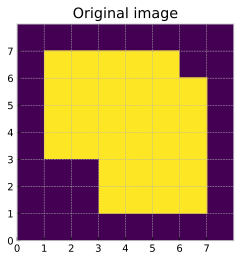

In [3]:
# A 8x8 binary image represented as a numpy array
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

# Plotting the image using matplotlib
plt.title('Original image')
plt.xticks(range(image.shape[0]))
plt.yticks(range(image.shape[1]))
plt.imshow(image, extent=[0, image.shape[0], 0, image.shape[1]], cmap='viridis')
plt.show()

Now that we have defined our image for testing, we can go ahead and use $eq. (1.3)$ to encode the pixel intensities as probability amplitudes of different states of the system:-

In [4]:
# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

# Get the amplitude ancoded pixel values
# Horizontal: Original image
image_norm_h = amplitude_encode(image)

# Vertical: Transpose of Original image
image_norm_v = amplitude_encode(image.T)

As can be seen in the above python code, we obtain two different aplitude encoded quantum images. The first one (`image_norm_h`) is for the horizontal scanning of the image and the second one (`image_norm_v`) is for the vertical scanning of the image.

After this we initialize the number of qubits and the amplitude permutation unitary like so,

In [5]:
# Initialize some global variable for number of qubits
data_qb = 6
anc_qb = 1
total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)

Once, we have normalized the pixel values, converted them to probability amplitudes, anc determined the number of qubits necessary for processing the image, we can start making the quantum circuit for the same.

Since, our image now basically represents the amplitudes of different quantum states, we can directly use the `initialize()` method to perform the state preparation. After this, we add a Hadamard gate to the auxiliary qubit, then the amplitude permutation unitary, and then again a Hadamard gate to auxiliary qubit. Also, the whole circuit is repeated once more for the vertical scanning of image.

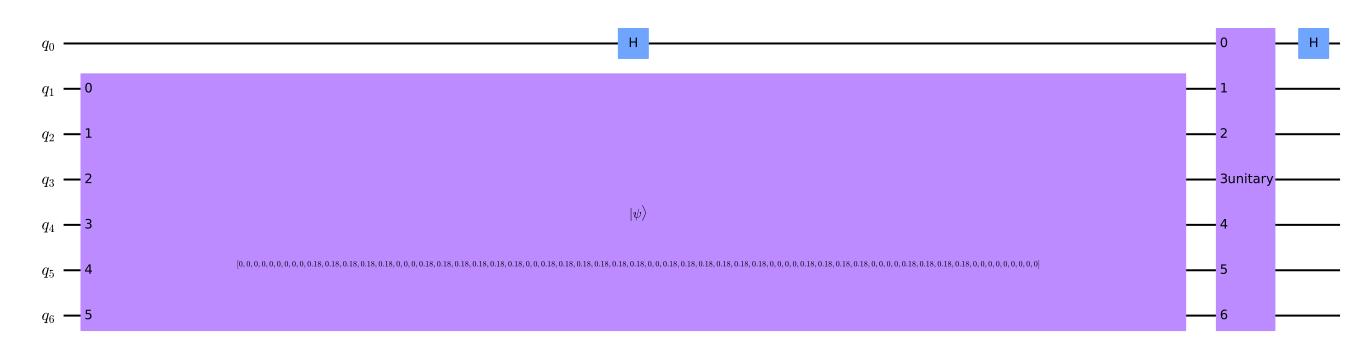

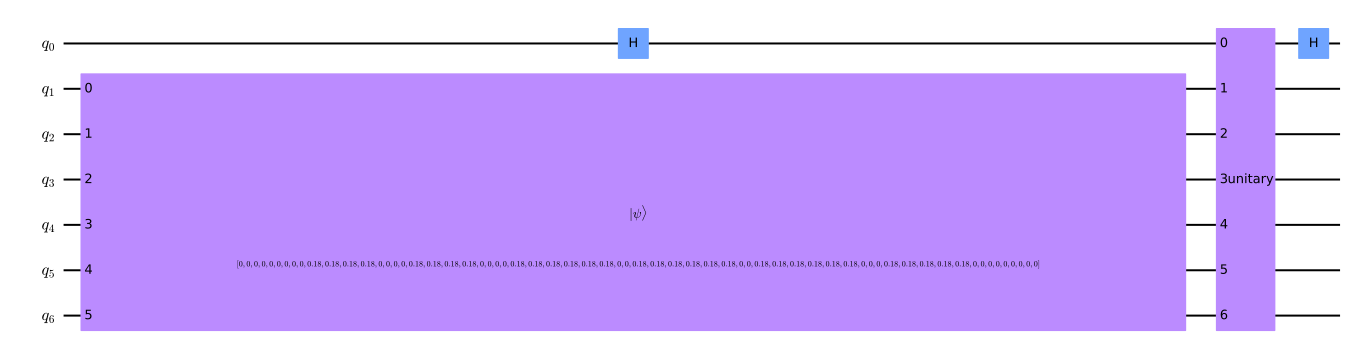

In [6]:
# Create the circuit for horizontal scan
qc_h = QuantumCircuit(total_qb)
qc_h.initialize(image_norm_h, range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)
display(qc_h.draw('mpl', fold=-1))

# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_qb)
qc_v.initialize(image_norm_v, range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)
display(qc_v.draw('mpl', fold=-1))

# Combine both circuits into a single list
circ_list = [qc_h, qc_v]

Now, we simulate the circuits using the `statevector_simulator` and obtain the statevector of the system as the output.

In [14]:
# Simulating the cirucits
back = Aer.get_backend('statevector_simulator')
results = execute(circ_list, backend=back).result()
sv_h = results.get_statevector(qc_h)
sv_v = results.get_statevector(qc_v)

from qiskit.visualization import array_to_latex
print('Horizontal scan statevector:')
display(array_to_latex(sv_h[:30], max_size=30))
print()
print('Vertical scan statevector:')
display(array_to_latex(sv_v[:30], max_size=30))

Horizontal scan statevector:


<IPython.core.display.Latex object>


Vertical scan statevector:


<IPython.core.display.Latex object>

From $eq. (2.6)$, we can clearly see that we need to consider only those states where the auxiliary qubit (qubit-0 or LSB in our case) gives a measurement output of $\ket{1}$. Since, we know that LSB is 1 in a bit-string only for odd numbers, we easily just take the amplitudes corresponding to odd states from the statevector to form our image and discard all the even states.

The following code, performs this task along with some classical post-processing to ensure that we get the best results when we plot our image.

In [7]:
# Classical postprocessing for plotting the output
output_h = []
output_v = []

# todo: is there a neater way of rounding values?
# todo: can we avoid avoid code duplication?

# Post processing of horizontal scan statevector
k = 0
while k < 2**data_qb:
    idx = 2*k+1
    amp = sv_h[idx]
    
    # Round the amplitude to ZERO if the value is very small
    if amp.real > 1e-15:
        output_h.append(1)
    elif amp.real < -1e-15:
        output_h.append(0)
        output_h.append(1)
        k += 1
    else:
        output_h.append(0)
    k += 1

# Post processing of vertical scan statevector
k = 0
while k < 2**data_qb:
    idx = 2*k+1
    amp = sv_v[idx]
    
    # Round the amplitude to ZERO if the value is very small
    if amp.real > 1e-15:
        output_v.append(1)
    elif amp.real < -1e-15:
        output_v.append(0)
        output_v.append(1)
        k += 1
    else:
        output_v.append(0)
    k += 1

After we filter the required states from the raw statevector, we can rearrange the 1D array of amplitudes to a 2D matrix to get our edge detected horizontal and vertical scans like so,

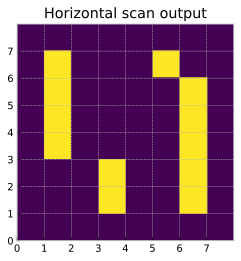

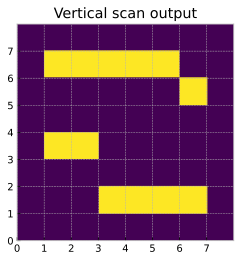

In [8]:
# Reshaping the image from 1D array to 2D array
# todo: investigate if np.reshape can do this?
edge_scan_h = []
edge_scan_v = []

for i in range(image.shape[0]):
    edge_scan_h.append([])
    edge_scan_v.append([])
    for j in range(image.shape[0]):
        edge_scan_h[i].append(output_h[image.shape[0]*i+j])
        edge_scan_v[i].append(output_v[image.shape[0]*i+j])

edge_scan_h = np.array(edge_scan_h)
edge_scan_v = np.array(edge_scan_v).T

plt.title('Horizontal scan output')
plt.xticks(range(image.shape[0]))
plt.yticks(range(image.shape[1]))
plt.imshow(edge_scan_h, extent=[0, image.shape[0], 0, image.shape[1]])
plt.show()

plt.title('Vertical scan output')
plt.xticks(range(image.shape[0]))
plt.yticks(range(image.shape[1]))
plt.imshow(edge_scan_v, extent=[0, image.shape[0], 0, image.shape[1]])
plt.show()

Finally, we combine both horizontal and vertical scans to get the complete edge detected image as shown below,

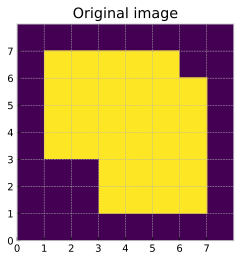

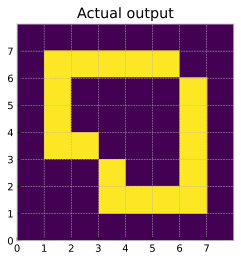

In [9]:
# Combining the horizontal and vertical component of the result
# todo: use numpy '|' operator for this
edge_scan_sim = edge_scan_h

for i in range(image.shape[0]):
    for j in range(image.shape[0]):
        if edge_scan_v[i][j] == 1:
            edge_scan_sim[i][j] = 1
            
# Plotting the original and edge-detected images
plt.title('Original image')
plt.xticks(range(image.shape[0]))
plt.yticks(range(image.shape[1]))
plt.imshow(image, extent=[0, image.shape[0], 0, image.shape[0]])
plt.show()

plt.title('Actual output')
plt.xticks(range(image.shape[0]))
plt.yticks(range(image.shape[1]))
plt.imshow(edge_scan_sim, extent=[0, image.shape[0], 0, image.shape[0]])
plt.show()

### Running on Real Hardware
This section takes a part of the previously simulated image (represented by the `qc_h` and `qc_v`) and runs them on the `ibmq_manila` backend to test the running the algorithm on a real quantum computer with inherent noise and error characteristics specific to the hardware.

First we import and load our IBMQ account and select the `ibmq_manila` backend.

In [10]:
from qiskit import IBMQ
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q', group='open')
backend = provider.get_backend('ibmq_manila')

Since, running on actual hardware deals with encountering errors due to noise, we only limit this example to run on (2+1)-qubits as of now. For the demonstration, now we can crop a part of the the above image that was used in the simulation,

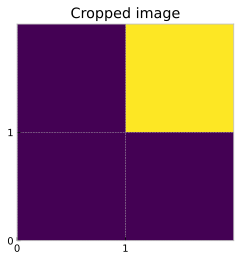

In [10]:
# Create a 2x2 image to be run on the hardware
image_small = image[6:8, 2:4]  # todo: explain which pixels these correspond to in the image above

# Plotting the image_small using matplotlib
plt.title('Cropped image')
plt.xticks(range(image_small.shape[0]))
plt.yticks(range(image_small.shape[1]))
plt.imshow(image_small, extent=[0, image_small.shape[0], 0, image_small.shape[1]], cmap='viridis')
plt.show()

Converting the classical image into quantum image by encoding it with the QPIE image representation,

In [12]:
# Get the amplitude ancoded pixel values
# Horizontal: Cropped image
image_small_norm_h = amplitude_encode(image_small)

# Vertical: Transpose of Cropped image
image_small_norm_v = amplitude_encode(image_small.T)

Defining the parameters for the quantum circuit of the QHED algorithm and creating instances of horizontal and vertical scan circuits,

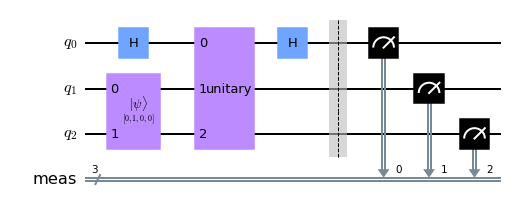

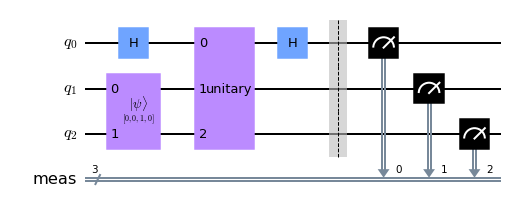

In [14]:
# Initialize some global variable for number of qubits
data_qb = 2
anc_qb = 1
total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)
# Create the circuit for horizontal scan
qc_small_h = QuantumCircuit(total_qb)
qc_small_h.initialize(image_small_norm_h, range(1, total_qb))
qc_small_h.h(0)
qc_small_h.unitary(D2n_1, range(total_qb))  # todo: can we include an efficient way to do this?
qc_small_h.h(0)
qc_small_h.measure_all()
display(qc_small_h.draw('mpl'))

# Create the circuit for vertical scan
qc_small_v = QuantumCircuit(total_qb)
qc_small_v.initialize(image_small_norm_v, range(1, total_qb))
qc_small_v.h(0)
qc_small_v.unitary(D2n_1, range(total_qb))
qc_small_v.h(0)
qc_small_v.measure_all()
display(qc_small_v.draw('mpl'))

# Combine both circuits into a single list
circ_list = [qc_small_h, qc_small_v]

For running the circuit on real hardware, it is necessary to decompose the above quantum circuit into the basis gates $(X, SX, RZ(\theta), CX)$ for the `ibmq_manila` backend in order to run the circuit properly. To achieve this, we transpile the above circuit according to our backend's coupling map and also set the `optimization_level=3`, to get the most most optimized circuit according to the hardware.

In [15]:
# Transpile the circuits for optimized execution on the backend
circ_list_t = transpile(circ_list, backend=backend, optimization_level=3)

Finally, we run the circuits on our backend and obtain the results shown in the histograms below,

In [16]:
from qiskit.tools.monitor import job_monitor

# Executing the circuits on the backend
job = execute(circ_list_t, backend=backend, shots=8192)
job_monitor(job)

Job Status: job has successfully run


Counts for Horizontal scan:


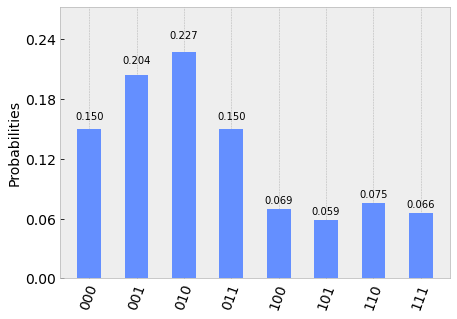



Counts for Vertical scan:


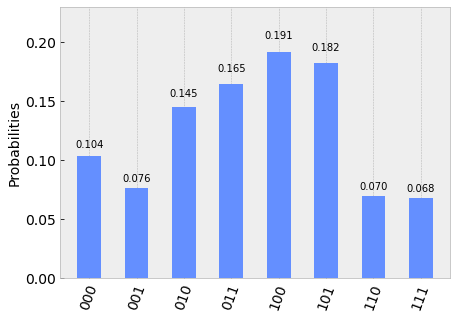

In [18]:
from qiskit.visualization import plot_histogram

# Getting the resultant probability distribution after measurement
result = job.result()
counts_h = result.get_counts(qc_small_h)
counts_v = result.get_counts(qc_small_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

Now, we extract the counts of the odd-numbered states from horizontal and vertical scans because only those states contain the pixel intensity gradient information in which the auxiliary qubit is in the state $|1 \rangle$.

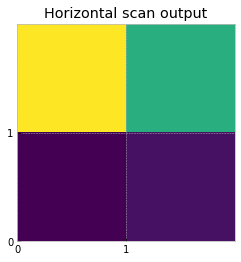

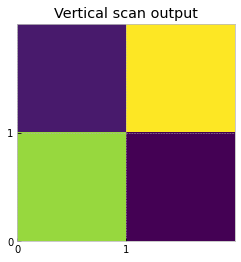

In [21]:
# Extracting counts for odd-numbered states
edge_scan_small_h = np.array([counts_h[f'{2*i+1:03b}'] for i in range(2**data_qb)]).reshape(2, 2)
edge_scan_small_v = np.array([counts_v[f'{2*i+1:03b}'] for i in range(2**data_qb)]).reshape(2, 2).T

plt.title('Horizontal scan output')
plt.xticks(range(edge_scan_small_h.shape[0]))
plt.yticks(range(edge_scan_small_h.shape[1]))
plt.imshow(edge_scan_small_h, extent=[0, edge_scan_small_h.shape[0], 0, edge_scan_small_h.shape[1]])
plt.show()

plt.title('Vertical scan output')
plt.xticks(range(edge_scan_small_v.shape[0]))
plt.yticks(range(edge_scan_small_v.shape[1]))
plt.imshow(edge_scan_small_v, extent=[0, edge_scan_small_v.shape[0], 0, edge_scan_small_v.shape[1]])
plt.show()

Finally, we combine both horizontal and vertical scans to make the full edge detection cropped image as shown below,

(todo: can we add the output of a either perfect simulation on this image, or a classical edge detection algorithm)

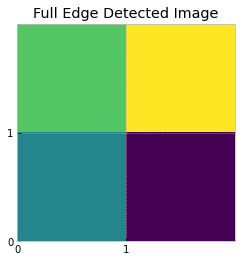

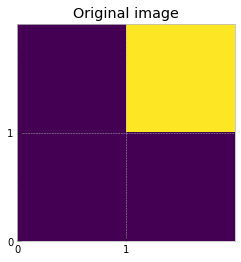

In [22]:
edge_detected_image_small = edge_scan_small_h + edge_scan_small_v

plt.title('Full Edge Detected Image')
plt.xticks(range(edge_detected_image_small.shape[0]))
plt.yticks(range(edge_detected_image_small.shape[1]))
plt.imshow(edge_detected_image_small, extent=[0, edge_detected_image_small.shape[0], 0, edge_detected_image_small.shape[1]])
plt.show()

# Plotting the original and edge-detected images
plt.title('Original image')
plt.xticks(range(image_small.shape[0]))
plt.yticks(range(image_small.shape[1]))
plt.imshow(image_small, extent=[0, image_small.shape[0], 0, image_small.shape[0]])
plt.show()

## QHED on Larger Images (todo: can we turn this into an exercise for the reader?)

As the quantum technology advances, we will see more and more applications related to faster image processing and image manipulation. However, for processing insanely large data like 4K images and videos, one would have to process the image in multiple parts until we reach the stage of fault-tolerant quantum hardware.

This example tries to simulate a similar workflow to perform edge detection for an image which is approximately $1000 \times$ larger than out previous $8 \times 8$ pixel image example. In the example below, we try to process a $256 \times 256$ pixel image by diving it into multiple smaller images and then combining them together at the end.

In [23]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Importing some helper libraries for
# plotting and image manipulation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('default')

from PIL import Image

For this example, we load a $256 \times 256$ pixel, 8-bit color, custom image from the system and convert it to a numpy matrix. We also define `image_crop_size = 32`, which means that this image will be divided into multiple parts, each of size $32 \times 32$ pixels. Creating a total of 64 image parts.

(256, 256, 3) uint8
(256, 256)


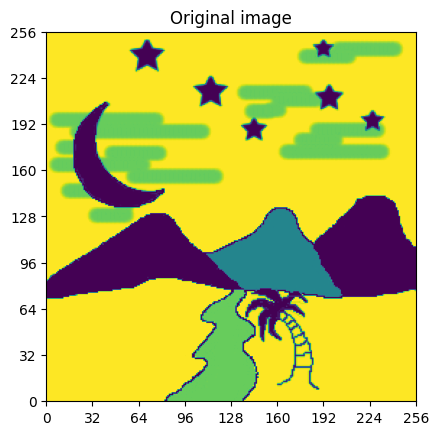

In [24]:
image_size = 256       # Original image-width
image_crop_size = 32   # Width of each part of image for processing


# Load the image from filesystem
image_raw = np.array(Image.open('./images/edge_detection.jpg'))
print(image_raw.shape, image_raw.dtype)


# Convert the RBG component of the image to B&W image, as a numpy (uint8) array
image = []
for i in range(image_size):
    image.append([])
    for j in range(image_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)
print(image.shape)


# Display the image
plt.title('Original image')
plt.xticks(range(0, 257, 32))
plt.yticks(range(0, 257, 32))
plt.imshow(image, extent=[0, image_size, 0, image_size], cmap='viridis')
plt.show()

Since, each part that we're processing is of size $32 \times 32$ or $1024$ pixels, we can accommodate the pixel values of each part within 10 `data_qubits` and we need 1 `auxiliary qubit` for implementing the QHED for each part.

In [25]:
# Initialize some global variable for number of qubits
data_qb = 10
anc_qb = 1
total_qb = data_qb + anc_qb

In [26]:
# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)

The circuit for the algorithm still remains the same with just an increased qubit count and slightly higher circuit depth as can be seen in the `divide_image_and_simulate()` function below,

In [27]:
def divide_image_and_simulate(img):
    # Get the amplitude ancoded pixel values
    # Horizontal: Original image part
    image_norm_h = amplitude_encode(img)
    
    
    # Vertical: Transpose of Original image part
    image_norm_v = amplitude_encode(img.T)

    
    # Create the circuit for horizontal scan
    qc_h = QuantumCircuit(total_qb)
    qc_h.initialize(image_norm_h, range(1, total_qb))
    qc_h.h(0)
    qc_h.unitary(D2n_1, range(total_qb))
    qc_h.h(0)

    
    # Create the circuit for vertical scan
    qc_v = QuantumCircuit(total_qb)
    qc_v.initialize(image_norm_v, range(1, total_qb))
    qc_v.h(0)
    qc_v.unitary(D2n_1, range(total_qb))
    qc_v.h(0)

    
    # Combine both circuits into a single list
    circ_list = [qc_h, qc_v]
    
    
    # Simulate the circuits on `stateveector_simulator`
    back = Aer.get_backend('statevector_simulator')
    results = execute(circ_list, backend=back).result()
    
    
    # Return the statevector
    return results.get_statevector(qc_h), results.get_statevector(qc_v)

Then we define a function for the classical post-processing of the obtained statevector like so,

In [28]:
# Function for classical post-processin of simulation result
def classical_post_proc(sv, txt):
    output = []

    k = 0
    while k < 2**data_qb:
        idx = 2*k+1
        amp = sv[idx]
        
        
        # Round the amplitude to ZERO if the value is very small
        if amp.real > 1e-15:
            output.append(amp.real)
        elif amp.real < -1e-15:
            output.append(0)
            output.append(amp.real)
            k += 1
        else:
            output.append(amp.real)
        k += 1


    # Reshape the image part from a 1D array to a 2D array
    edge_image_scan = np.array(output[:1024]).reshape((32, 32))
    
    
    # Transpose the image in case of vertical scan to get the actual untransposed image
    if txt[0] == 'v' or txt[0] == 'V':
        edge_image_scan = edge_image_scan.T
    
    return edge_image_scan

And last but not the least, we iterate through the different image parts and obtain the results separately for each of the 64 parts.

In [29]:
# Initialize empty lists for storing edge detected statevectors
# for horizontal and vertical scans
edge_image_scan_h = []
edge_image_scan_v = []

for i in range(image_size // image_crop_size):
    for j in range(image_size // image_crop_size):
        print(f'Simulating image part: ({i}, {j}) : ', end='\t')
        
        
        # Determine the starting and ending index for each image part
        si = i*32; ei = si + 32
        sj = j*32; ej = sj + 32
        
        
        # Create circuit for the part of image
        # Simulate and get get the output statevector
        sv_h, sv_v = divide_image_and_simulate(image[si:ei, sj:ej])
        
        
        # Perform classical post-processing
        # and print the current image shape for verification of progress
        edge_image_scan_h.append(classical_post_proc(sv_h, 'horizontal'))
        edge_image_scan_v.append(classical_post_proc(sv_v, 'vertical'))
        print(f'({len(edge_image_scan_h)}, {len(edge_image_scan_h[0])}, {len(edge_image_scan_h[0][0])})', end='\t')
        print(f'({len(edge_image_scan_v)}, {len(edge_image_scan_v[0])}, {len(edge_image_scan_v[0][0])})')

Simulating image part: (0, 0) : 	(1, 32, 32)	(1, 32, 32)
Simulating image part: (0, 1) : 	(2, 32, 32)	(2, 32, 32)
Simulating image part: (0, 2) : 	(3, 32, 32)	(3, 32, 32)
Simulating image part: (0, 3) : 	(4, 32, 32)	(4, 32, 32)
Simulating image part: (0, 4) : 	(5, 32, 32)	(5, 32, 32)
Simulating image part: (0, 5) : 	(6, 32, 32)	(6, 32, 32)
Simulating image part: (0, 6) : 	(7, 32, 32)	(7, 32, 32)
Simulating image part: (0, 7) : 	(8, 32, 32)	(8, 32, 32)
Simulating image part: (1, 0) : 	(9, 32, 32)	(9, 32, 32)
Simulating image part: (1, 1) : 	(10, 32, 32)	(10, 32, 32)
Simulating image part: (1, 2) : 	(11, 32, 32)	(11, 32, 32)
Simulating image part: (1, 3) : 	(12, 32, 32)	(12, 32, 32)
Simulating image part: (1, 4) : 	(13, 32, 32)	(13, 32, 32)
Simulating image part: (1, 5) : 	(14, 32, 32)	(14, 32, 32)
Simulating image part: (1, 6) : 	(15, 32, 32)	(15, 32, 32)
Simulating image part: (1, 7) : 	(16, 32, 32)	(16, 32, 32)
Simulating image part: (2, 0) : 	(17, 32, 32)	(17, 32, 32)
Simulating imag

Now we combine all the image parts that we have for the horizontal and vertical scans of the image into a single horizontal and vertical scan edge detected image like so,

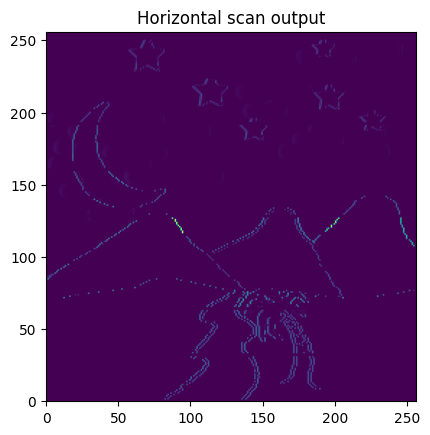

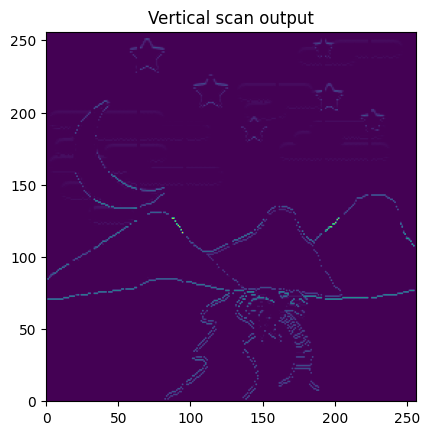

In [30]:
# Convert statevector lists to numpy arrays
edge_image_scan_h = np.array(edge_image_scan_h)
edge_image_scan_v = np.array(edge_image_scan_v)


# Initialize empty lists for storing
# horizontal and vertical edge detected images
image_scan_h = []
image_scan_v = []


# Combining the horizontal and vertical component of the result
for i in range(image_size):
    image_scan_h.append([])
    image_scan_v.append([])
    for j in range(image_size):
        block_idx = (j // image_crop_size) + (image_size // image_crop_size) * (i // image_crop_size)
        row_idx = i % image_crop_size
        idx = j % image_crop_size
        ele_h = np.abs(edge_image_scan_h[block_idx][row_idx][idx])
        ele_v = np.abs(edge_image_scan_v[block_idx][row_idx][idx])
        
        # Ignore the pixels on four sides of each image part as it can have minor edge detection errors
        if idx == 0 or idx == image_crop_size-1 or row_idx == 0 or row_idx == image_crop_size-1:
            image_scan_h[i].append(0)
            image_scan_v[i].append(0)
        
        # If pixel is not on the four sides,
        # take the amplitude as the pixel intensity
        else:
            if ele_h > 1e-17:
                image_scan_h[i].append(ele_h)
            else:
                image_scan_h[i].append(0)
                
            if ele_v > 1e-17:
                image_scan_v[i].append(ele_v)
            else:
                image_scan_v[i].append(0)


# Plot the horizontal and vertical edge detected images
plt.title('Horizontal scan output')
plt.imshow(image_scan_h, extent=[0, image_size, 0, image_size], cmap='viridis')
plt.show()

plt.title('Vertical scan output')
plt.imshow(image_scan_v, extent=[0, image_size, 0, image_size], cmap='viridis')
plt.show()

And finally, to get the complete edge detected image, we combine both horizontal and vertical scan images into a single edge detected image by just adding the amplitudes of the individual pixels of both scans.

The code below forms the final edge detected image and also plots the original and edge detected image side-by-side for a ocmparison.

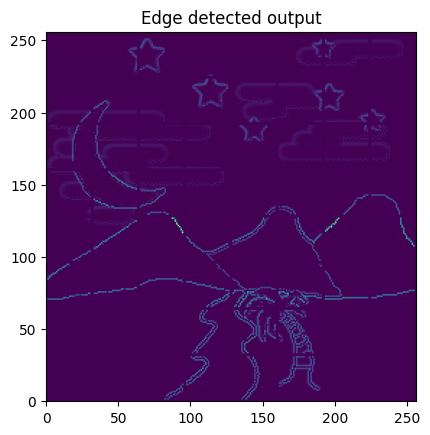

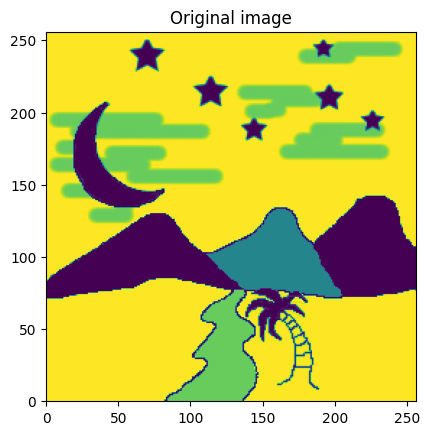

In [31]:
# Convert horizontal and vertical
# edge detected image lists to numpy arrays
image_scan_h = np.array(image_scan_h)
image_scan_v = np.array(image_scan_v)


# Combine both horizontal and vertical components
# to get the final edge detected image
edge_output_sim = (image_scan_h + image_scan_v) ** 0.7


# Plot the edge detected output and original output
# side by side for comparison
plt.title('Edge detected output')
plt.imshow(edge_output_sim, extent=[0, image_size, 0, image_size], cmap='viridis')
plt.show()

plt.title('Original image')
plt.imshow(image, extent=[0, image_size, 0, image_size], cmap='viridis')
plt.show()

# References 

[1] Le, P.Q., Dong, F. & Hirota, K. A flexible representation of quantum images for polynomial preparation, image compression, and processing operations. Quantum Inf Process 10, 63–84 (2011). https://doi.org/10.1007/s11128-010-0177-y 

[2] Zhang, Y., Lu, K., Gao, Y. et al. _NEQR: a novel enhanced quantum representation of digital images._ Quantum Inf Process 12, 2833–2860 (2013). https://doi.org/10.1007/s11128-013-0567-z

[3] Yao, Xi-Wei, et al. "Quantum image processing and its application to edge detection: theory and experiment." Physical Review X 7.3 (2017): 031041. https://arxiv.org/abs/1801.01465

[4] Zhang, Yi, Kai Lu, and YingHui Gao. "QSobel: a novel quantum image edge extraction algorithm." Science China Information Sciences 58.1 (2015): 1-13. https://link.springer.com/article/10.1007/s11432-014-5158-9

[5] Yan, Fei, Abdullah M. Iliyasu, and Salvador E. Venegas-Andraca. "A survey of quantum image representations." Quantum Information Processing 15.1 (2016): 1-35. https://link.springer.com/article/10.1007/s11128-015-1195-6

In [32]:
import qiskit.tools.jupyter
%qiskit_version_table